In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# DATASET BITCOIN

In [178]:
# Read data from the CSV file
data = pd.read_csv('Bitcoin Historical Data.csv')
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)
data = data.sort_index(ascending=False)
data = data.reset_index(drop=True)

data

,Date,Price,Open,High,Low,Vol.,Change %
0,2013-03-01,34.5,33.4,34.9,32.9,39.79K,3.36%
1,2013-03-02,34.3,34.5,34.8,33.2,36.66K,-0.72%
2,2013-03-03,34.5,34.3,34.5,33.8,12.53K,0.73%
3,2013-03-04,36.2,34.5,36.7,34.2,46.77K,4.78%
4,2013-03-05,40.3,36.2,40.7,36.2,85.43K,11.56%
...,...,...,...,...,...,...,...
4106,2024-05-28,68366.0,69428.3,69560.7,67299.9,71.39K,-1.53%
4107,2024-05-29,67635.8,68366.2,68897.6,67143.2,52.13K,-1.07%
4108,2024-05-30,68354.7,67631.3,69504.7,67138.4,66.84K,1.06%
4109,2024-05-31,67530.1,68352.3,69018.2,66676.8,61.51K,-1.21%


In [179]:
data1 = data.reset_index()['Price']
data1

0          34.5
1          34.3
2          34.5
3          36.2
4          40.3
         ...   
4106    68366.0
4107    67635.8
4108    68354.7
4109    67530.1
4110    67760.8
Name: Price, Length: 4111, dtype: float64

In [180]:
#Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
data1 = scaler.fit_transform(np.array(data1).reshape(-1, 1))
data1

array([[2.73852558e-06],
       [0.00000000e+00],
       [2.73852558e-06],
       ...,
       [9.35485814e-01],
       [9.24194873e-01],
       [9.27353763e-01]])

### RATIO 6:4

In [181]:
# Split the data into training and testing sets 6:4
train_size = int(0.6 * len(data1))
test_size = len(data1) - train_size

train_data = data1[:train_size]
test_data = data1[train_size:]

In [182]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [183]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [184]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [185]:
# Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [186]:
# Fit model with data train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0023 - val_loss: 0.0046
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 5.6858e-05 - val_loss: 6.7754e-04
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 3.0900e-05 - val_loss: 6.8853e-04
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 3.1929e-05 - val_loss: 6.2958e-04
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 2.6685e-05 - val_loss: 6.1320e-04
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 2.7494e-05 - val_loss: 6.2238e-04
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 2.5738e-05 - val_loss: 5.9565e-04
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 2.2515e-05 - val_loss: 5.5014e-04
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 2.2937e-05 - val_loss: 5.7489e-04
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 2.6078e-05 - val_loss: 5.7239e-04
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 2.8008

In [187]:
# Forecast test data
y_pred = model.predict(X_test)

# Normalize y_pred data
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [188]:
# Predict the closing prices for the next 30, 60, 90 days
def predict_30_days(model, data, time_step):
    return predict_future(model, data, time_step, 30)

def predict_60_days(model, data, time_step):
    return predict_future(model, data, time_step, 60)

def predict_90_days(model, data, time_step):
    return predict_future(model, data, time_step, 90)

def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_30_days(model, test_data, n_steps)
pred_60_days = predict_60_days(model, test_data, n_steps)
pred_90_days = predict_90_days(model, test_data, n_steps)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))

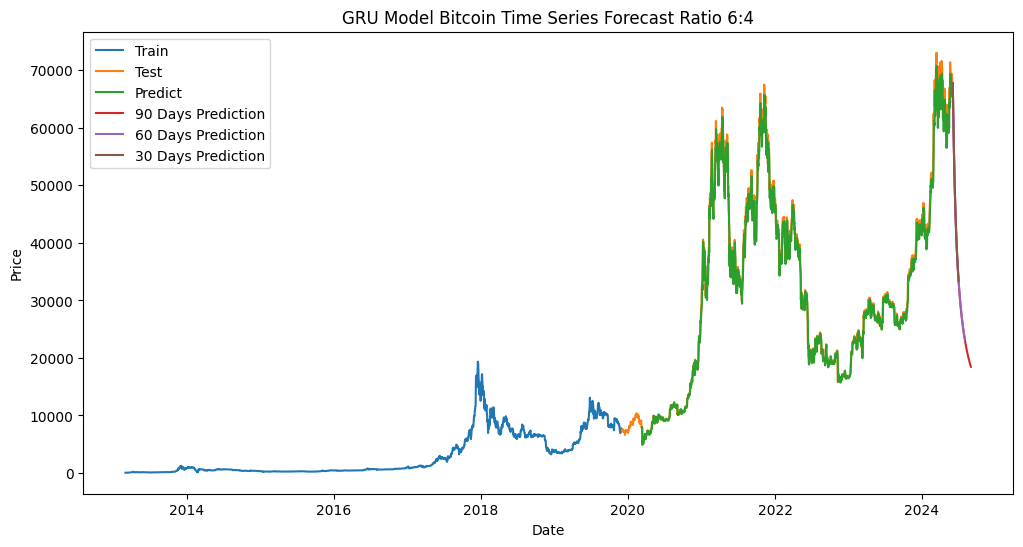

In [189]:
# Drawing
plt.figure(figsize=(12, 6))
dates = pd.to_datetime(data['Date'])

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates.iloc[-1]

future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_30_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_30_days), axis=0)
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=61)
future_60_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_60_days), axis=0)
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=91)
future_90_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_90_days), axis=0)

# Drawing 90 days
plt.plot(future_dates_90, future_90_with_last[:len(future_dates_90)], label='90 Days Prediction')

# Drawing 60 days
plt.plot(future_dates_60, future_60_with_last[:len(future_dates_60)], label='60 Days Prediction')

# Drawing 30 days
plt.plot(future_dates_30, future_30_with_last[:len(future_dates_30)], label='30 Days Prediction')

plt.legend()
plt.title('GRU Model Bitcoin Time Series Forecast Ratio 6:4')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [190]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("Testing MAPE:", mape)

Testing RMSE: 1484.5383765007932
Testing MAE: 955.1593755059909
Testing MAPE: 2.689243354392619


### RATIO 7:3

In [191]:
# Split the data into training and testing sets 7:3
train_size = int(0.7 * len(data1))
test_size = len(data1) - train_size

train_data = data1[:train_size]
test_data = data1[train_size:]

In [192]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [193]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [194]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [195]:
# Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [196]:
# Fit model with data train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0038 - val_loss: 0.0087
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 7.3078e-05 - val_loss: 0.0013
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 4.2676e-05 - val_loss: 0.0010
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 4.4263e-05 - val_loss: 8.0540e-04
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 3.8193e-05 - val_loss: 8.1822e-04
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 3.8699e-05 - val_loss: 0.0014
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 5.6472e-05 - val_loss: 7.5540e-04
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 4.0612e-05 - val_loss: 9.3995e-04
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 4.2495e-05 - val_loss: 6.5880e-04
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 3.5689e-05 - val_loss: 8.3165e-04
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 3.6085e-05 - val_l

In [197]:
# Forecast test data
y_pred = model.predict(X_test)

# Normalize y_pred data
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [198]:
# Predict the closing prices for the next 30, 60, 90 days
def predict_30_days(model, data, time_step):
    return predict_future(model, data, time_step, 30)

def predict_60_days(model, data, time_step):
    return predict_future(model, data, time_step, 60)

def predict_90_days(model, data, time_step):
    return predict_future(model, data, time_step, 90)

def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_30_days(model, test_data, n_steps)
pred_60_days = predict_60_days(model, test_data, n_steps)
pred_90_days = predict_90_days(model, test_data, n_steps)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))

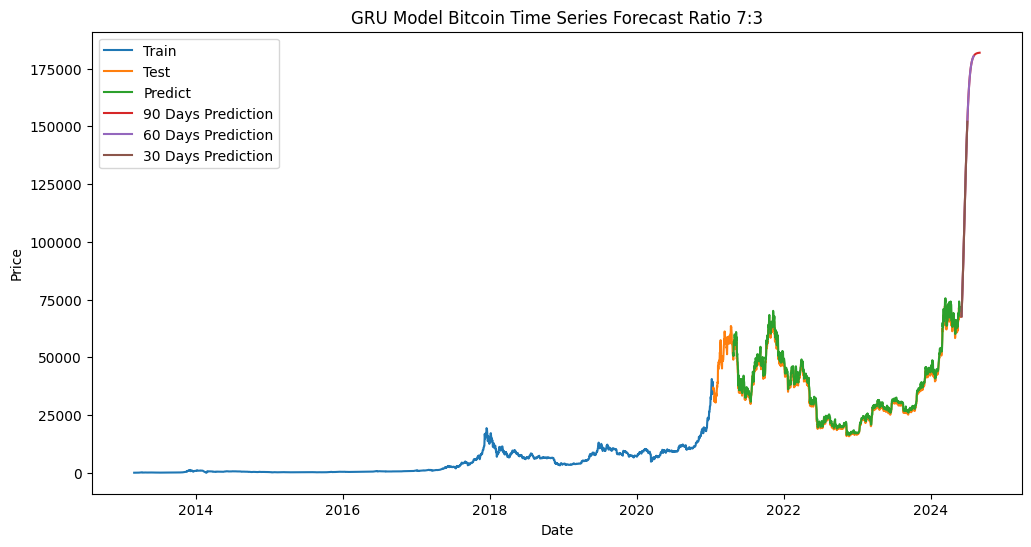

In [199]:
# Drawing
plt.figure(figsize=(12, 6))
dates = pd.to_datetime(data['Date'])

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates.iloc[-1]

future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_30_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_30_days), axis=0)
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=61)
future_60_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_60_days), axis=0)
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=91)
future_90_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_90_days), axis=0)

# Drawing 90 days
plt.plot(future_dates_90, future_90_with_last[:len(future_dates_90)], label='90 Days Prediction')

# Drawing 60 days
plt.plot(future_dates_60, future_60_with_last[:len(future_dates_60)], label='60 Days Prediction')

# Drawing 30 days
plt.plot(future_dates_30, future_30_with_last[:len(future_dates_30)], label='30 Days Prediction')

plt.legend()
plt.title('GRU Model Bitcoin Time Series Forecast Ratio 7:3')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [200]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("Testing MAPE:", mape)

Testing RMSE: 1880.3659942536285
Testing MAE: 1440.7654129661296
Testing MAPE: 3.9595231181053467


### RATIO 8:2

In [201]:
# Split the data into training and testing sets 8:2
train_size = int(0.8 * len(data1))
test_size = len(data1) - train_size

train_data = data1[:train_size]
test_data = data1[train_size:]

In [202]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [203]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [204]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [205]:
# Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [206]:
# Fit model with data train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0227 - val_loss: 9.8774e-04
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 2.9599e-04 - val_loss: 3.8879e-04
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.1221e-04 - val_loss: 3.7123e-04
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 1.8637e-04 - val_loss: 3.4288e-04
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 1.7552e-04 - val_loss: 3.3431e-04
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 1.7660e-04 - val_loss: 3.0542e-04
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 1.6169e-04 - val_loss: 2.9435e-04
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 1.5392e-04 - val_loss: 2.8930e-04
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 1.4703e-04 - val_loss: 3.0162e-04
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 1.3279e-04 - val_loss: 2.8370e-04
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 1.

In [207]:
# Forecast test data
y_pred = model.predict(X_test)

# Normalize y_pred data
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [208]:
# Predict the closing prices for the next 30, 60, 90 days
def predict_30_days(model, data, time_step):
    return predict_future(model, data, time_step, 30)

def predict_60_days(model, data, time_step):
    return predict_future(model, data, time_step, 60)

def predict_90_days(model, data, time_step):
    return predict_future(model, data, time_step, 90)

def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_30_days(model, test_data, n_steps)
pred_60_days = predict_60_days(model, test_data, n_steps)
pred_90_days = predict_90_days(model, test_data, n_steps)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))

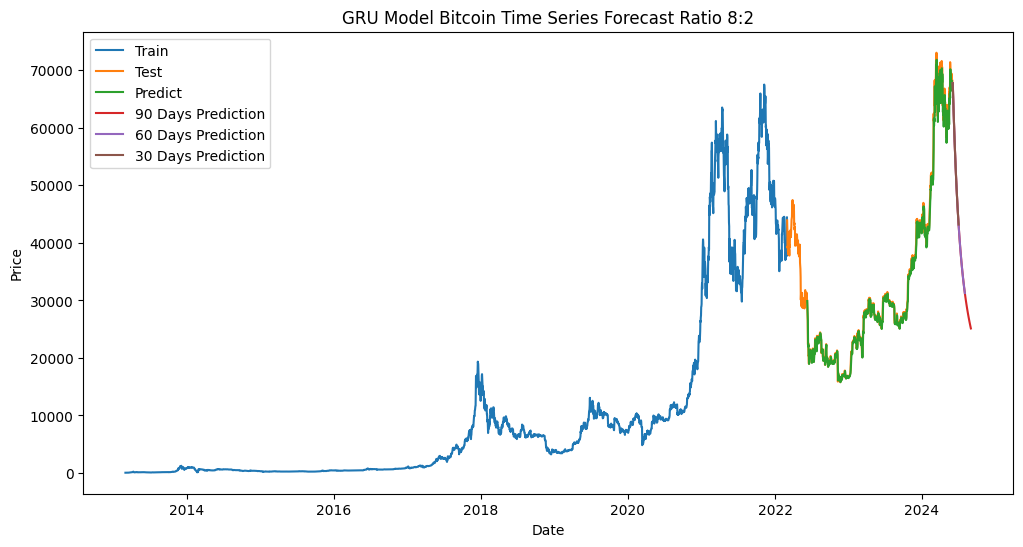

In [209]:
# Drawing
plt.figure(figsize=(12, 6))
dates = pd.to_datetime(data['Date'])

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates.iloc[-1]

future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_30_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_30_days), axis=0)
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=61)
future_60_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_60_days), axis=0)
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=91)
future_90_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_90_days), axis=0)

# Drawing 90 days
plt.plot(future_dates_90, future_90_with_last[:len(future_dates_90)], label='90 Days Prediction')

# Drawing 60 days
plt.plot(future_dates_60, future_60_with_last[:len(future_dates_60)], label='60 Days Prediction')

# Drawing 30 days
plt.plot(future_dates_30, future_30_with_last[:len(future_dates_30)], label='30 Days Prediction')

plt.legend()
plt.title('GRU Model Bitcoin Time Series Forecast Ratio 8:2')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [210]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("Testing MAPE:", mape)

Testing RMSE: 1146.5947194789371
Testing MAE: 698.9492558106823
Testing MAPE: 2.008099044357094


# DATASET NASDAQ

In [230]:
# Read data from the CSV file
data = pd.read_csv('NASDAQ Composite Historical Data.csv')
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)
data = data.sort_index(ascending=False)
data = data.reset_index(drop=True)

data

,Date,Price,Open,High,Low,Vol.,Change %
0,2013-03-01,3169.74,3143.54,3171.50,3129.40,431.39M,0.30%
1,2013-03-04,3182.03,3159.46,3182.27,3154.79,397.77M,0.39%
2,2013-03-05,3224.13,3200.38,3227.31,3200.27,418.69M,1.32%
3,2013-03-06,3222.37,3233.31,3233.44,3217.67,377.54M,-0.05%
4,2013-03-07,3232.09,3224.50,3235.10,3221.47,365.78M,0.30%
...,...,...,...,...,...,...,...
2828,2024-05-24,16920.79,16786.79,16947.79,16771.58,953.61M,1.10%
2829,2024-05-28,17019.88,16988.31,17032.65,16917.51,1.10B,0.59%
2830,2024-05-29,16920.58,16879.35,16989.60,16873.97,1.15B,-0.58%
2831,2024-05-30,16737.08,16878.63,16900.46,16690.36,1.11B,-1.08%


In [231]:
data1 = data.reset_index()['Price']
data1

0        3169.74
1        3182.03
2        3224.13
3        3222.37
4        3232.09
          ...   
2828    16920.79
2829    17019.88
2830    16920.58
2831    16737.08
2832    16735.02
Name: Price, Length: 2833, dtype: float64

In [232]:
#Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
data1 = scaler.fit_transform(np.array(data1).reshape(-1, 1))
data1

array([[2.43981313e-04],
       [1.13112047e-03],
       [4.17005931e-03],
       ...,
       [9.92832147e-01],
       [9.79586416e-01],
       [9.79437717e-01]])

### RATIO 6:4

In [233]:
# Split the data into training and testing sets 6:4
train_size = int(0.6 * len(data1))
test_size = len(data1) - train_size

train_data = data1[:train_size]
test_data = data1[train_size:]

In [234]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [235]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [236]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [237]:
# Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [238]:
# Fit model with data train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0076 - val_loss: 0.0331
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 7.1342e-04 - val_loss: 0.0013
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 5.9090e-05 - val_loss: 8.2331e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 4.2506e-05 - val_loss: 3.6219e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 3.3912e-05 - val_loss: 3.9583e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 3.5923e-05 - val_loss: 3.5526e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 3.2491e-05 - val_loss: 3.5577e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 3.4084e-05 - val_loss: 3.3315e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 3.6815e-05 - val_loss: 3.5294e-04
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 3.5672e-05 - val_loss: 3.1769e-04
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 3.8153e-05 - val_loss:

In [239]:
# Forecast test data
y_pred = model.predict(X_test)

# Normalize y_pred data
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [240]:
# Predict the closing prices for the next 30, 60, 90 days
def predict_30_days(model, data, time_step):
    return predict_future(model, data, time_step, 30)

def predict_60_days(model, data, time_step):
    return predict_future(model, data, time_step, 60)

def predict_90_days(model, data, time_step):
    return predict_future(model, data, time_step, 90)

def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_30_days(model, test_data, n_steps)
pred_60_days = predict_60_days(model, test_data, n_steps)
pred_90_days = predict_90_days(model, test_data, n_steps)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))

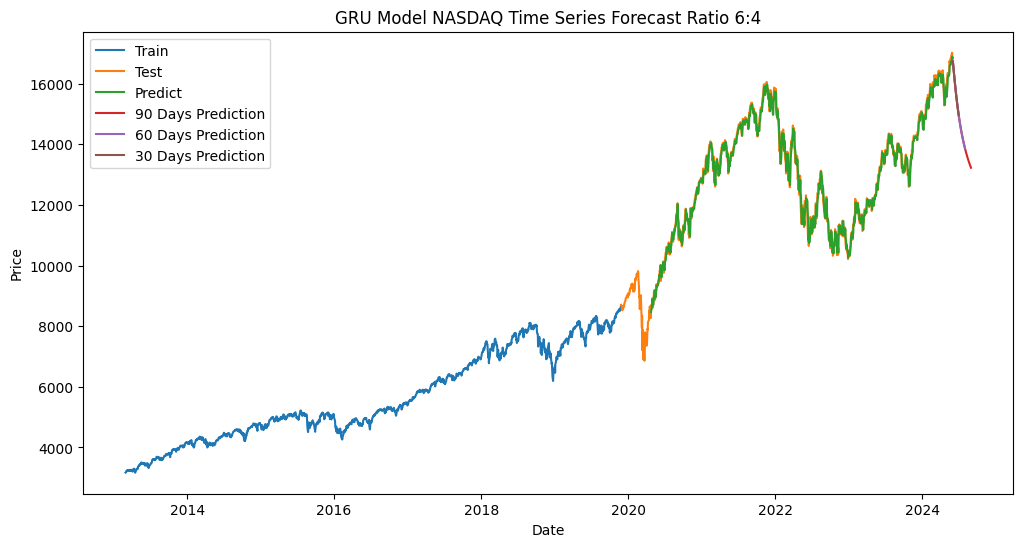

In [241]:
# Drawing
plt.figure(figsize=(12, 6))
dates = pd.to_datetime(data['Date'])

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates.iloc[-1]

future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_30_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_30_days), axis=0)
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=61)
future_60_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_60_days), axis=0)
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=91)
future_90_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_90_days), axis=0)

# Drawing 90 days
plt.plot(future_dates_90, future_90_with_last[:len(future_dates_90)], label='90 Days Prediction')

# Drawing 60 days
plt.plot(future_dates_60, future_60_with_last[:len(future_dates_60)], label='60 Days Prediction')

# Drawing 30 days
plt.plot(future_dates_30, future_30_with_last[:len(future_dates_30)], label='30 Days Prediction')

plt.legend()
plt.title('GRU Model NASDAQ Time Series Forecast Ratio 6:4')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [242]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("Testing MAPE:", mape)

Testing RMSE: 189.40816671872997
Testing MAE: 149.73068924703534
Testing MAPE: 1.169947164384978


### RATIO 7:3

In [243]:
# Split the data into training and testing sets 7:3
train_size = int(0.7 * len(data1))
test_size = len(data1) - train_size

train_data = data1[:train_size]
test_data = data1[train_size:]

In [244]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [245]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [246]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [247]:
# Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [248]:
# Fit model with data train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0446 - val_loss: 0.0584
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0031 - val_loss: 9.7940e-04
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 1.6472e-04 - val_loss: 0.0010
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 9.9689e-05 - val_loss: 8.0355e-04
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 1.0111e-04 - val_loss: 5.3695e-04
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 9.9335e-05 - val_loss: 6.9372e-04
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 8.8152e-05 - val_loss: 7.1429e-04
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 8.6173e-05 - val_loss: 5.2630e-04
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 8.8372e-05 - val_loss: 6.5280e-04
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 1.0060e-04 - val_loss: 6.8342e-04
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 9.0975e-05 - 

In [249]:
# Forecast test data
y_pred = model.predict(X_test)

# Normalize y_pred data
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [250]:
# Predict the closing prices for the next 30, 60, 90 days
def predict_30_days(model, data, time_step):
    return predict_future(model, data, time_step, 30)

def predict_60_days(model, data, time_step):
    return predict_future(model, data, time_step, 60)

def predict_90_days(model, data, time_step):
    return predict_future(model, data, time_step, 90)

def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_30_days(model, test_data, n_steps)
pred_60_days = predict_60_days(model, test_data, n_steps)
pred_90_days = predict_90_days(model, test_data, n_steps)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))

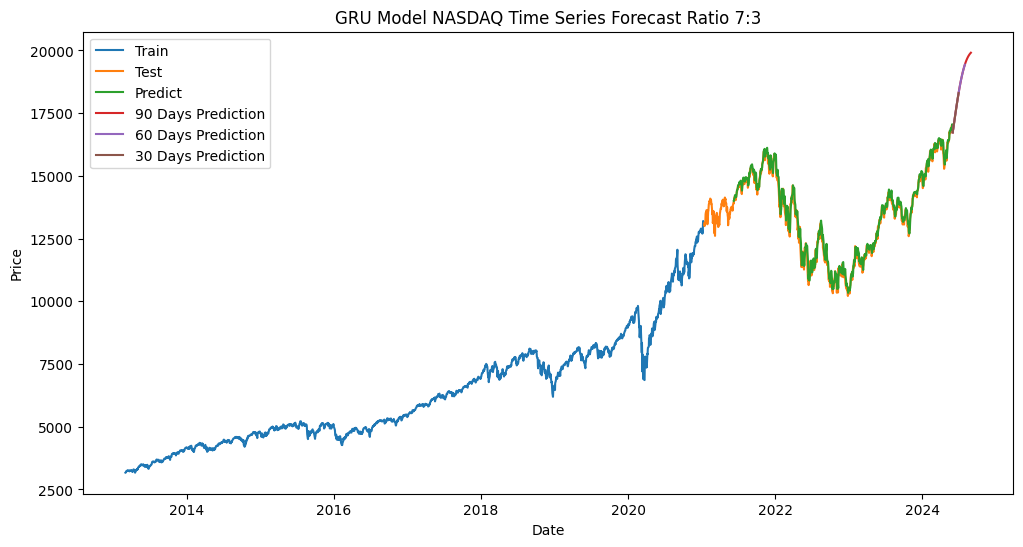

In [251]:
# Drawing
plt.figure(figsize=(12, 6))
dates = pd.to_datetime(data['Date'])

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates.iloc[-1]

future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_30_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_30_days), axis=0)
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=61)
future_60_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_60_days), axis=0)
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=91)
future_90_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_90_days), axis=0)

# Drawing 90 days
plt.plot(future_dates_90, future_90_with_last[:len(future_dates_90)], label='90 Days Prediction')

# Drawing 60 days
plt.plot(future_dates_60, future_60_with_last[:len(future_dates_60)], label='60 Days Prediction')

# Drawing 30 days
plt.plot(future_dates_30, future_30_with_last[:len(future_dates_30)], label='30 Days Prediction')

plt.legend()
plt.title('GRU Model NASDAQ Time Series Forecast Ratio 7:3')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [252]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("Testing MAPE:", mape)

Testing RMSE: 212.40934900964587
Testing MAE: 165.2946788426235
Testing MAPE: 1.2678718870527779


### RATIO 8:2

In [253]:
# Split the data into training and testing sets 8:2
train_size = int(0.8 * len(data1))
test_size = len(data1) - train_size

train_data = data1[:train_size]
test_data = data1[train_size:]

In [254]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [255]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [256]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [257]:
# Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [258]:
# Fit model with data train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0834 - val_loss: 0.0205
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0025 - val_loss: 4.9316e-04
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 2.1948e-04 - val_loss: 3.1470e-04
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 1.4558e-04 - val_loss: 3.0373e-04
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 1.5561e-04 - val_loss: 3.2609e-04
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 1.3241e-04 - val_loss: 2.8093e-04
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 1.2262e-04 - val_loss: 2.8249e-04
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 1.1557e-04 - val_loss: 2.6261e-04
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 1.1527e-04 - val_loss: 2.5633e-04
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 1.0662e-04 - val_loss: 2.6223e-04
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 1.0494e-04

In [259]:
# Forecast test data
y_pred = model.predict(X_test)

# Normalize y_pred data
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [260]:
# Predict the closing prices for the next 30, 60, 90 days
def predict_30_days(model, data, time_step):
    return predict_future(model, data, time_step, 30)

def predict_60_days(model, data, time_step):
    return predict_future(model, data, time_step, 60)

def predict_90_days(model, data, time_step):
    return predict_future(model, data, time_step, 90)

def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_30_days(model, test_data, n_steps)
pred_60_days = predict_60_days(model, test_data, n_steps)
pred_90_days = predict_90_days(model, test_data, n_steps)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))

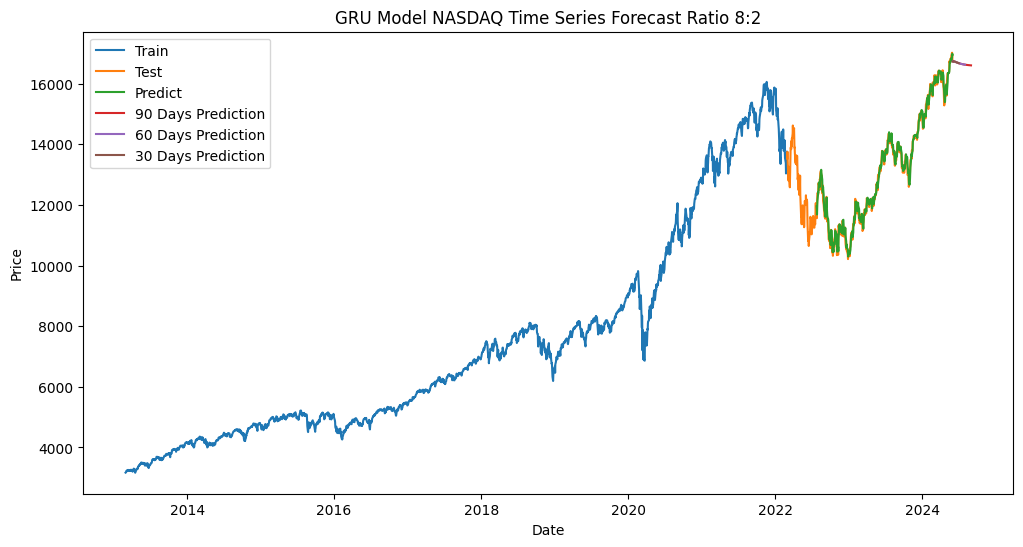

In [261]:
# Drawing
plt.figure(figsize=(12, 6))
dates = pd.to_datetime(data['Date'])

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates.iloc[-1]

future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_30_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_30_days), axis=0)
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=61)
future_60_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_60_days), axis=0)
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=91)
future_90_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_90_days), axis=0)

# Drawing 90 days
plt.plot(future_dates_90, future_90_with_last[:len(future_dates_90)], label='90 Days Prediction')

# Drawing 60 days
plt.plot(future_dates_60, future_60_with_last[:len(future_dates_60)], label='60 Days Prediction')

# Drawing 30 days
plt.plot(future_dates_30, future_30_with_last[:len(future_dates_30)], label='30 Days Prediction')

plt.legend()
plt.title('GRU Model NASDAQ Time Series Forecast Ratio 8:2')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [262]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("Testing MAPE:", mape)

Testing RMSE: 174.36188301199766
Testing MAE: 138.93299096365342
Testing MAPE: 1.0911619349147945


# DATASET USD

In [263]:
# Read data from the CSV file
data = pd.read_csv('US Dollar Index Futures Historical Data.csv')
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data = data.sort_index(ascending=False)
data = data.reset_index(drop=True)

data

,Date,Price,Open,High,Low,Vol.,Change %
0,2013-03-01,82.358,82.010,82.580,81.850,34.83K,0.43%
1,2013-03-04,82.255,82.355,82.530,82.230,19.76K,-0.13%
2,2013-03-05,82.147,82.210,82.300,81.955,25.02K,-0.13%
3,2013-03-06,82.507,82.020,82.640,81.975,26.04K,0.44%
4,2013-03-07,82.123,82.615,82.620,81.995,35.17K,-0.47%
...,...,...,...,...,...,...,...
2902,2024-05-27,104.638,104.645,104.670,104.485,3.09K,0.00%
2903,2024-05-28,104.539,104.490,104.560,104.260,11.02K,-0.09%
2904,2024-05-29,105.034,104.590,105.085,104.515,17.66K,0.47%
2905,2024-05-30,104.658,105.095,105.135,104.575,17.83K,-0.36%


In [264]:
data1 = data.reset_index()['Price']
data1

0        82.358
1        82.255
2        82.147
3        82.507
4        82.123
         ...   
2902    104.638
2903    104.539
2904    105.034
2905    104.658
2906    104.627
Name: Price, Length: 2907, dtype: float64

In [265]:
#Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
data1 = scaler.fit_transform(np.array(data1).reshape(-1, 1))
data1

array([[0.09255176],
       [0.08960225],
       [0.08650955],
       ...,
       [0.74190315],
       [0.73113599],
       [0.73024827]])

### RATIO 6:4

In [266]:
# Split the data into training and testing sets 6:4
train_size = int(0.6 * len(data1))
test_size = len(data1) - train_size

train_data = data1[:train_size]
test_data = data1[train_size:]

In [267]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [268]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [269]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [270]:
# Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [271]:
# Fit model with data train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0994 - val_loss: 0.0060
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0064 - val_loss: 0.0031
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 8.0052e-04 - val_loss: 3.8177e-04
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 3.4067e-04 - val_loss: 4.4338e-04
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 3.1775e-04 - val_loss: 3.6784e-04
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 2.9208e-04 - val_loss: 3.5102e-04
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 2.9968e-04 - val_loss: 3.5795e-04
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 2.7508e-04 - val_loss: 3.3216e-04
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 2.6739e-04 - val_loss: 3.1934e-04
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 2.6863e-04 - val_los

In [272]:
# Forecast test data
y_pred = model.predict(X_test)

# Normalize y_pred data
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [273]:
# Predict the closing prices for the next 30, 60, 90 days
def predict_30_days(model, data, time_step):
    return predict_future(model, data, time_step, 30)

def predict_60_days(model, data, time_step):
    return predict_future(model, data, time_step, 60)

def predict_90_days(model, data, time_step):
    return predict_future(model, data, time_step, 90)

def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_30_days(model, test_data, n_steps)
pred_60_days = predict_60_days(model, test_data, n_steps)
pred_90_days = predict_90_days(model, test_data, n_steps)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))

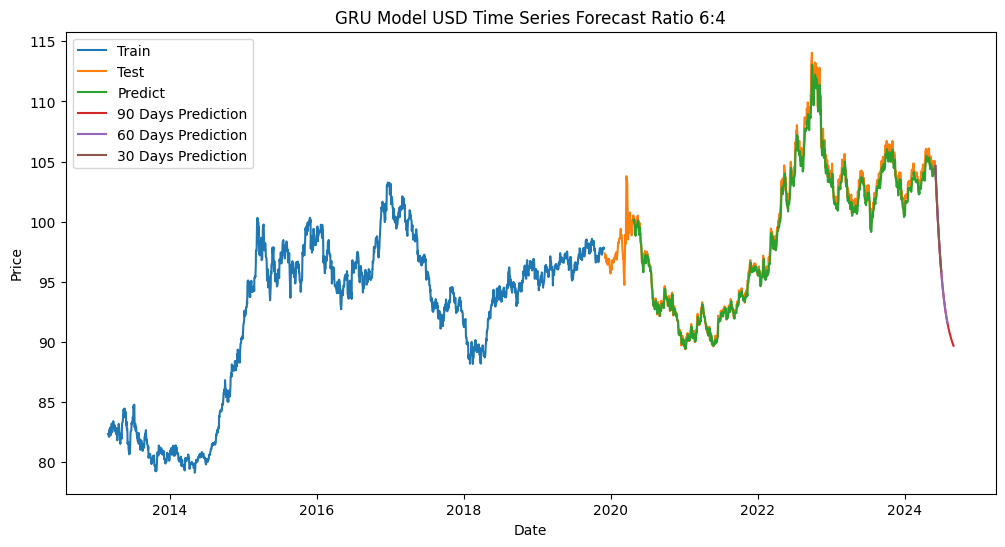

In [274]:
# Drawing
plt.figure(figsize=(12, 6))
dates = pd.to_datetime(data['Date'])

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates.iloc[-1]

future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_30_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_30_days), axis=0)
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=61)
future_60_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_60_days), axis=0)
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=91)
future_90_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_90_days), axis=0)

# Drawing 90 days
plt.plot(future_dates_90, future_90_with_last[:len(future_dates_90)], label='90 Days Prediction')

# Drawing 60 days
plt.plot(future_dates_60, future_60_with_last[:len(future_dates_60)], label='60 Days Prediction')

# Drawing 30 days
plt.plot(future_dates_30, future_30_with_last[:len(future_dates_30)], label='30 Days Prediction')

plt.legend()
plt.title('GRU Model USD Time Series Forecast Ratio 6:4')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [275]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("Testing MAPE:", mape)

Testing RMSE: 0.6264035801833869
Testing MAE: 0.483198749262061
Testing MAPE: 0.4754349219715217


### RATIO 7:3

In [276]:
# Split the data into training and testing sets 7:3
train_size = int(0.7 * len(data1))
test_size = len(data1) - train_size

train_data = data1[:train_size]
test_data = data1[train_size:]

In [277]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [278]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [279]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [280]:
# Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [281]:
# Fit model with data train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0896 - val_loss: 0.0168
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0054 - val_loss: 0.0037
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 5.0548e-04 - val_loss: 4.0353e-04
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 3.0744e-04 - val_loss: 3.7448e-04
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 2.8392e-04 - val_loss: 3.5125e-04
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 2.7656e-04 - val_loss: 3.5402e-04
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 2.3802e-04 - val_loss: 3.2738e-04
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 2.8760e-04 - val_loss: 3.1703e-04
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 2.6352e-04 - val_loss: 3.3234e-04
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 2.4552e-04 - val_loss:

In [282]:
# Forecast test data
y_pred = model.predict(X_test)

# Normalize y_pred data
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [283]:
# Predict the closing prices for the next 30, 60, 90 days
def predict_30_days(model, data, time_step):
    return predict_future(model, data, time_step, 30)

def predict_60_days(model, data, time_step):
    return predict_future(model, data, time_step, 60)

def predict_90_days(model, data, time_step):
    return predict_future(model, data, time_step, 90)

def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_30_days(model, test_data, n_steps)
pred_60_days = predict_60_days(model, test_data, n_steps)
pred_90_days = predict_90_days(model, test_data, n_steps)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))

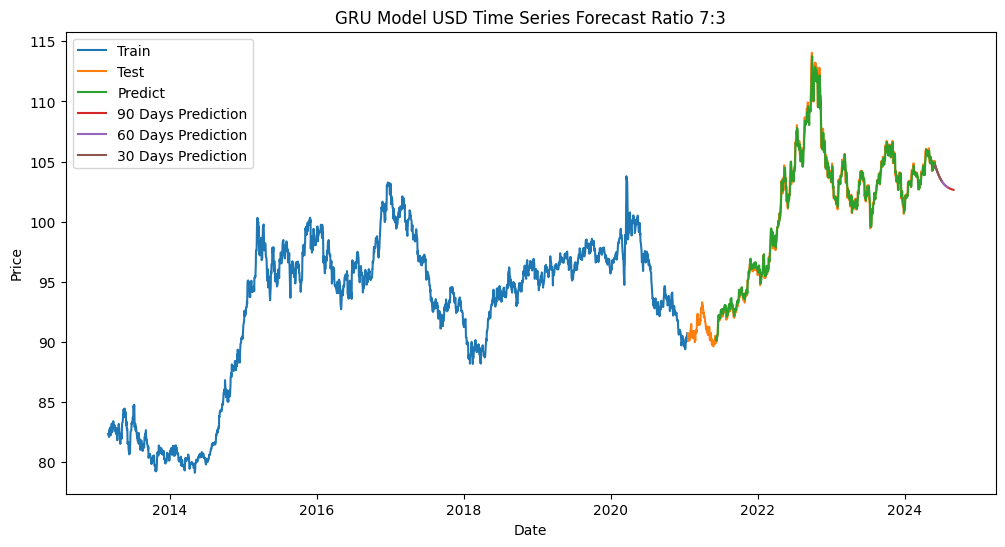

In [284]:
# Drawing
plt.figure(figsize=(12, 6))
dates = pd.to_datetime(data['Date'])

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates.iloc[-1]

future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_30_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_30_days), axis=0)
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=61)
future_60_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_60_days), axis=0)
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=91)
future_90_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_90_days), axis=0)

# Drawing 90 days
plt.plot(future_dates_90, future_90_with_last[:len(future_dates_90)], label='90 Days Prediction')

# Drawing 60 days
plt.plot(future_dates_60, future_60_with_last[:len(future_dates_60)], label='60 Days Prediction')

# Drawing 30 days
plt.plot(future_dates_30, future_30_with_last[:len(future_dates_30)], label='30 Days Prediction')

plt.legend()
plt.title('GRU Model USD Time Series Forecast Ratio 7:3')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [285]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("Testing MAPE:", mape)

Testing RMSE: 0.4971016790172585
Testing MAE: 0.3639953788006245
Testing MAPE: 0.35412641458865046


### RATIO 8:2

In [286]:
# Split the data into training and testing sets 8:2
train_size = int(0.8 * len(data1))
test_size = len(data1) - train_size

train_data = data1[:train_size]
test_data = data1[train_size:]

In [287]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [288]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [289]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [290]:
# Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [291]:
# Fit model with data train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0829 - val_loss: 0.0291
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0048 - val_loss: 0.0078
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 4.7967e-04 - val_loss: 4.1609e-04
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 2.6436e-04 - val_loss: 3.9562e-04
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 2.4436e-04 - val_loss: 3.9035e-04
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 2.3389e-04 - val_loss: 3.5915e-04
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 2.3291e-04 - val_loss: 3.5158e-04
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 2.1543e-04 - val_loss: 3.5402e-04
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 2.3376e-04 - val_loss: 3.5284e-04
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 2.4672e-04 - val_loss:

In [292]:
# Forecast test data
y_pred = model.predict(X_test)

# Normalize y_pred data
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [293]:
# Predict the closing prices for the next 30, 60, 90 days
def predict_30_days(model, data, time_step):
    return predict_future(model, data, time_step, 30)

def predict_60_days(model, data, time_step):
    return predict_future(model, data, time_step, 60)

def predict_90_days(model, data, time_step):
    return predict_future(model, data, time_step, 90)

def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_30_days(model, test_data, n_steps)
pred_60_days = predict_60_days(model, test_data, n_steps)
pred_90_days = predict_90_days(model, test_data, n_steps)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))

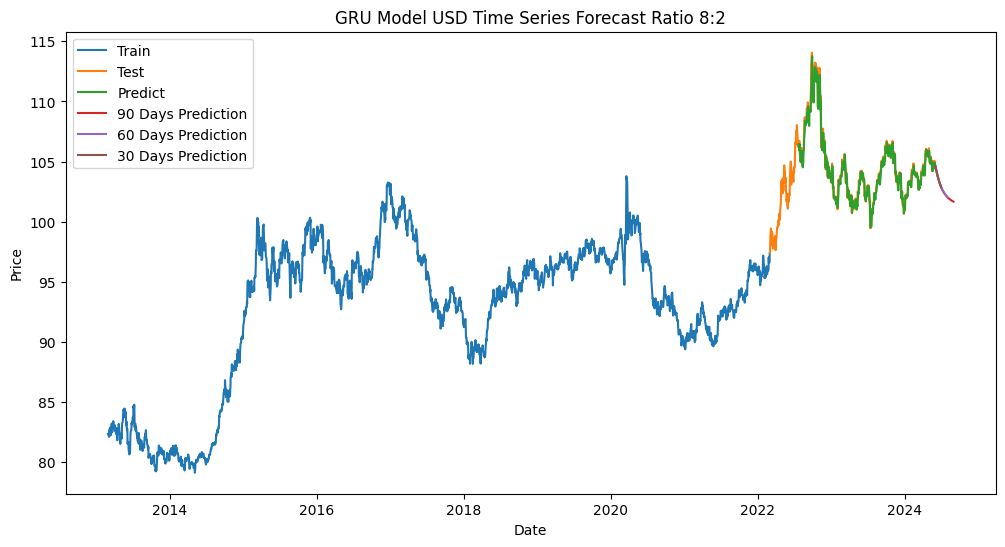

In [294]:
# Drawing
plt.figure(figsize=(12, 6))
dates = pd.to_datetime(data['Date'])

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates.iloc[-1]

future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_30_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_30_days), axis=0)
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=61)
future_60_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_60_days), axis=0)
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=91)
future_90_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_90_days), axis=0)

# Drawing 90 days
plt.plot(future_dates_90, future_90_with_last[:len(future_dates_90)], label='90 Days Prediction')

# Drawing 60 days
plt.plot(future_dates_60, future_60_with_last[:len(future_dates_60)], label='60 Days Prediction')

# Drawing 30 days
plt.plot(future_dates_30, future_30_with_last[:len(future_dates_30)], label='30 Days Prediction')

plt.legend()
plt.title('GRU Model USD Time Series Forecast Ratio 8:2')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [295]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("Testing MAPE:", mape)

Testing RMSE: 0.5347091934893765
Testing MAE: 0.3928050813734406
Testing MAPE: 0.37269914510309193
